In [198]:
#Importar as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

In [199]:
#Configurando apresentação de valores
pd.options.display.float_format = '{:20,.2f}'.format

In [200]:
#Alterando o estilo de paresentação dos gráficos
plt.style.use('seaborn')

In [201]:
#Ler a basa de dados

df = pd.read_excel('AdventureWorks.xlsx')

In [202]:
# Visualizando a base de dados
#Primeiras linhas

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [203]:
# Visualizando a base de dados
#Últimas linhas

df.tail()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.00,6,419.58,"5,574.42",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.00,6,"1,198.80","4,795.20",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
903,2008-12-21,2008-12-25,306,1155,19060,200812214CS676,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [204]:
#Tamanho da base de dados resultado => (linhas, colunas)

df.shape

(904, 16)

In [205]:
#Visualizar o nome das colunas

df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [206]:
#Tipo de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [207]:
#Receita total
total_vendas = df['Valor Venda'].sum()
print(f'R${total_vendas:.2f}')

R$5984606.14


In [208]:
#Custo Total
df['Custo Total'] = (df['Custo Unitário'] * df['Quantidade'])
total_custo = df['Custo Total'].sum()
total_custo

2486783.05

In [209]:
#Lucro
df['Lucro'] = df['Valor Venda']-df['Custo Total']
lucro_total = df['Lucro'].sum()
lucro_total

3497823.0926

In [210]:
#Tempo de envio para cada produto em dias
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df['Tempo Envio'].dtypes

dtype('int64')

In [211]:
#Média de tempo de envio dos produtos por marca
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64

In [212]:
# Contabilizando quantidade de missing values
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro             0
Tempo Envio       0
dtype: int64

In [213]:
#Lucro por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [214]:
#Resetando o Index, colocando no formato de tabela com índices
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [215]:
#Lista com total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produtos')

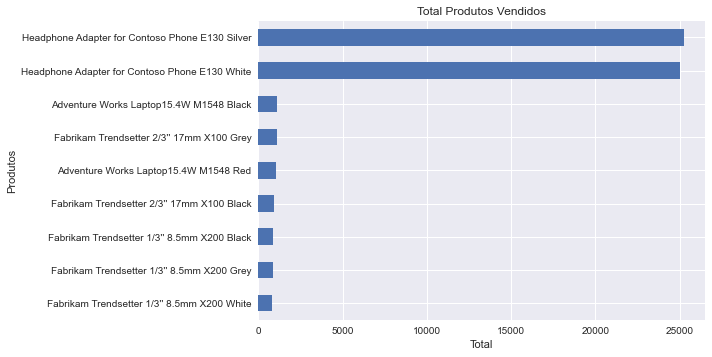

In [216]:
#Gráfico Total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total Produtos Vendidos')
plt.xlabel('Total')
#plt.xticks(rotation=30)
plt.ylabel('Produtos')

Text(0, 0.5, 'Total Lucro')

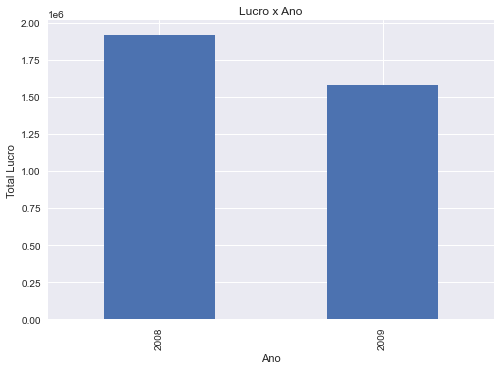

In [217]:
#Gráfico Ano x Lucro
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Total Lucro')

In [186]:
#Base de Dados apenas com as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

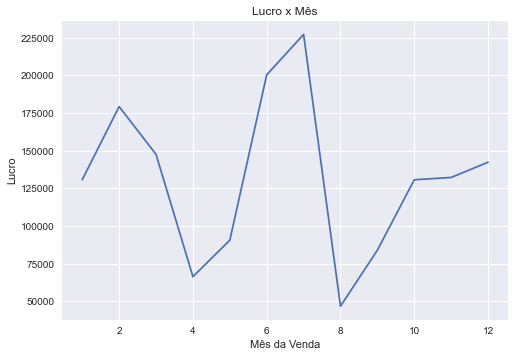

In [218]:
#Gráfico Lucro por mês
df_2009.groupby([df_2009['Data Venda'].dt.month])['Lucro'].sum().plot(title='Lucro x Mês')
plt.xlabel('Mês da Venda')
plt.ylabel('Lucro')

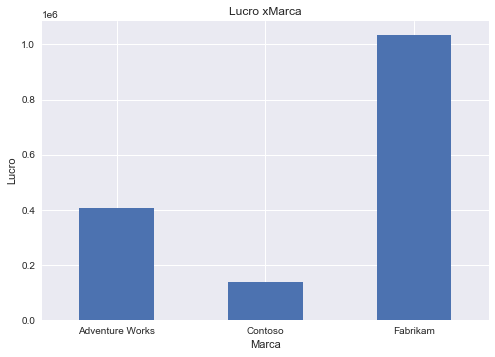

In [219]:
#Gráfico Lucro por Marca
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro xMarca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation=0);

<AxesSubplot:title={'center':'Lucro x Classe'}, xlabel='Classe'>

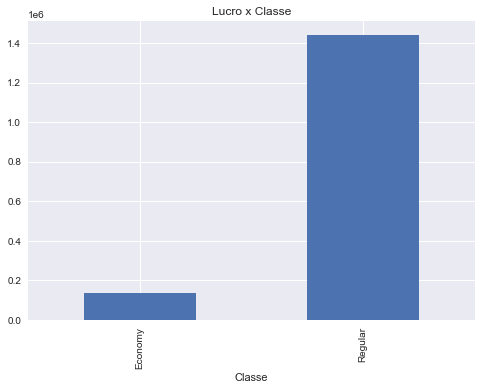

In [222]:
#Gráfico Lucro por Classe
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro x Classe')

In [226]:
#Visão geral do tempo de envio com média, desvio, mínimo, máximo
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

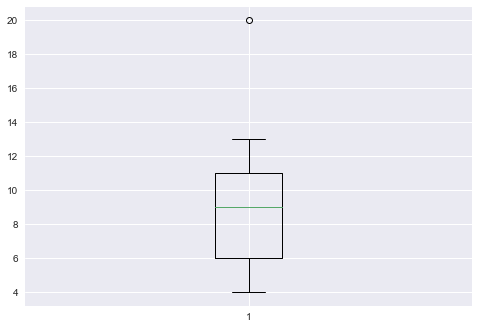

In [228]:
#Boxplot Tempo de Envio
plt.boxplot([df['Tempo Envio']]);

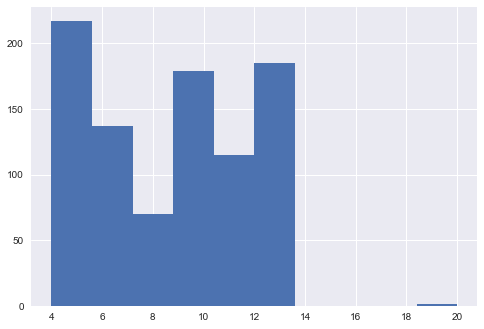

In [230]:
plt.hist(df['Tempo Envio']);

In [231]:
#Análisando OUTLIER
df[df['Tempo Envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [233]:
#Salvando a nova base de dados
df.to_csv('df_vendas_analisada.csv', index = False)